<a href="https://colab.research.google.com/github/chumpblocckami/colabs/blob/main/FEEDLY_news_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentence_transformers
"""https://www.sbert.net/docs/usage/semantic_textual_similarity.html"""

'https://www.sbert.net/docs/usage/semantic_textual_similarity.html'

In [ ]:
from sentence_transformers import SentenceTransformer,util
import pandas as pd 

model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

In [ ]:
data = pd.read_csv("all_news.csv")
data = data.loc[data["maintext"].notna()]
data.shape

(164, 18)

In [ ]:
data = data.loc[(data["topic"]=="augmented-reality") | (data["topic"]=="big-data") | (data["topic"]=="artificial-intelligence")|(data["topic"]=="blockchain")]
data["maintext"] = data["maintext"].drop_duplicates()
data.shape

(84, 22)

In [ ]:
embeddings = model.encode(data["maintext"].to_list())

In [ ]:
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

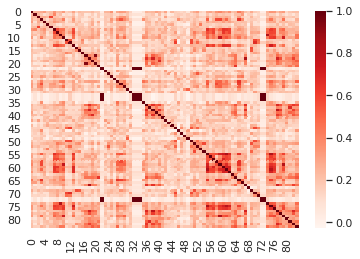

In [ ]:
import seaborn 
seaborn.set_theme(style="darkgrid")

seaborn.heatmap(cosine_scores,cmap="Reds")

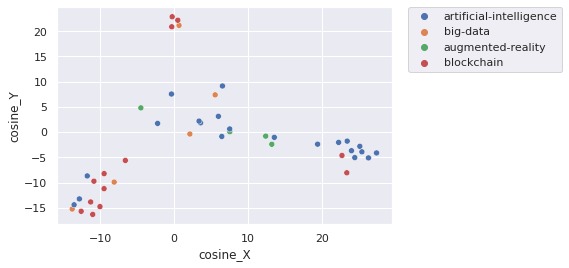

In [ ]:
"""https://distill.pub/2016/misread-tsne/"""
_cosine = pd.DataFrame(TSNE(n_components=2,
                               random_state=126,
                               perplexity=10, 
                               n_iter=5_000,
                               learning_rate=10).fit_transform(np.array(cosine_scores)),columns=["X","Y"])
data["cosine_X"] = _cosine["X"]
data["cosine_Y"] = _cosine["Y"]

seaborn.scatterplot(data=data, x="cosine_X",y="cosine_Y", hue="topic", legend="brief")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

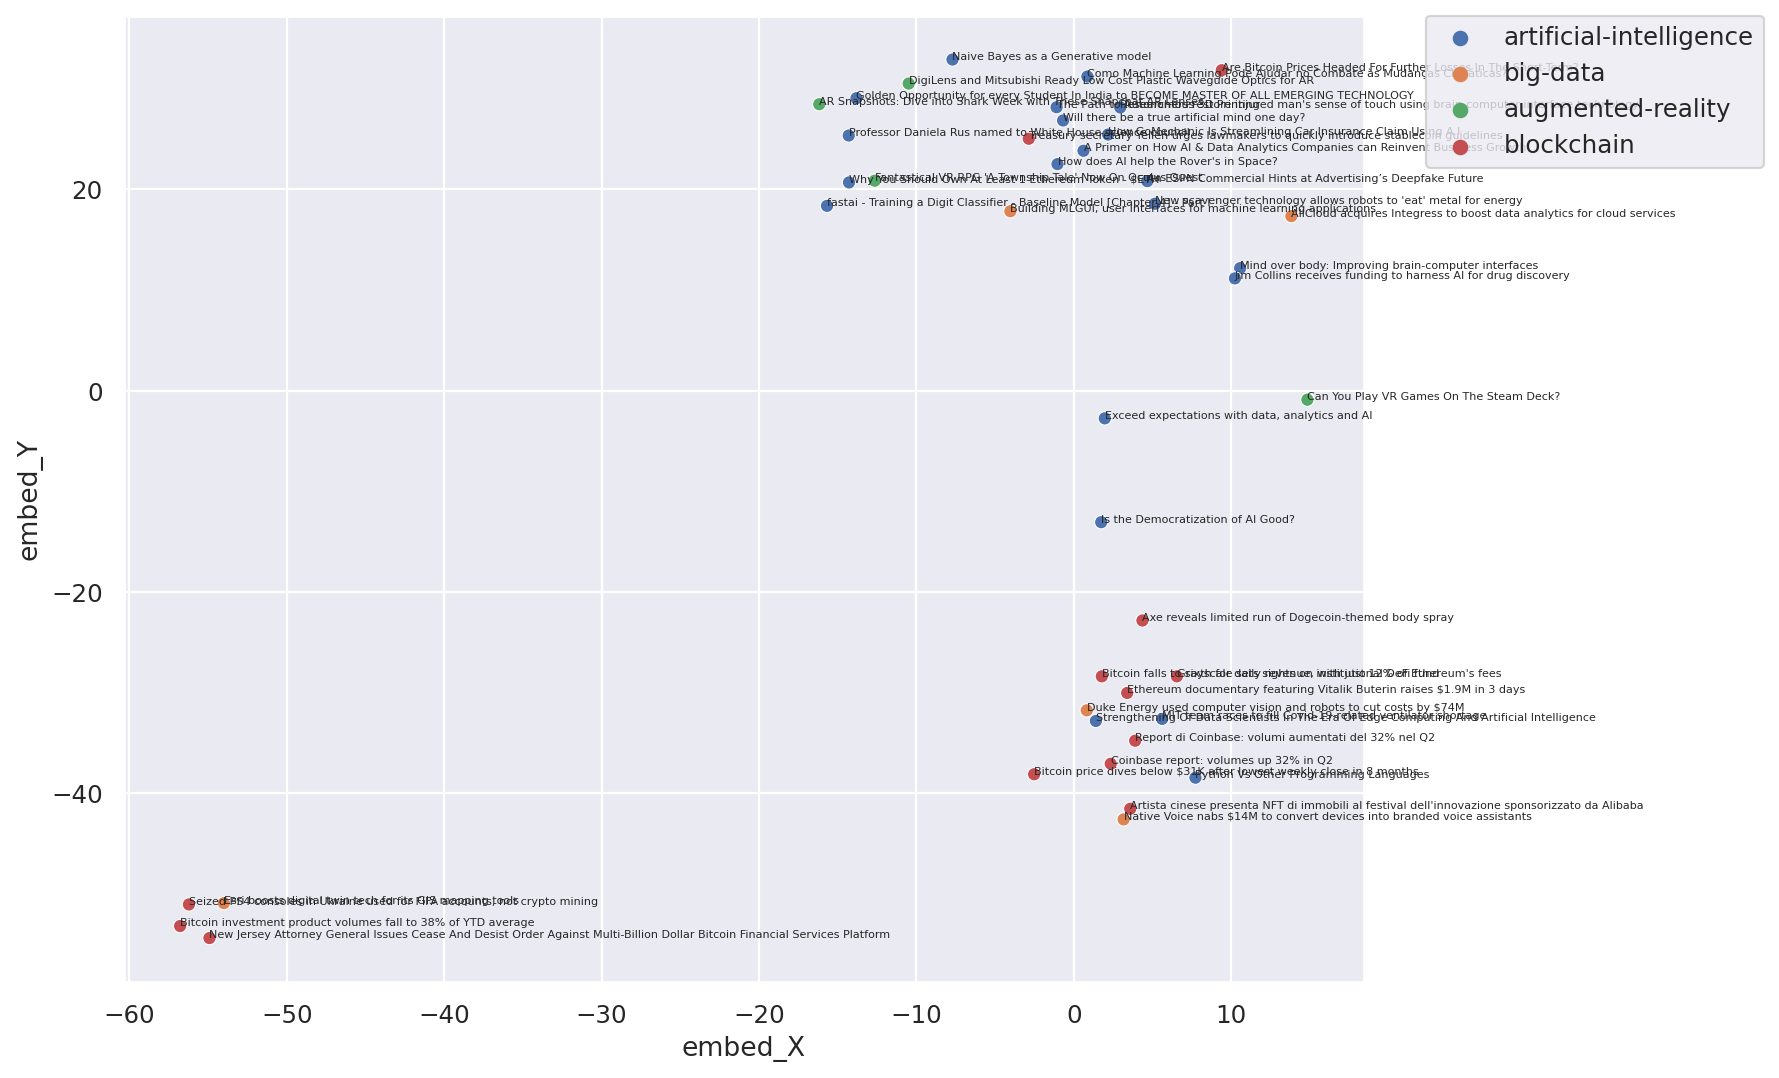

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

_embedding = pd.DataFrame(TSNE(n_components=2,
                               random_state=126,
                               perplexity=5, 
                               n_iter=3_000,
                               learning_rate=10).fit_transform(embeddings),columns=["X","Y"])
data["embed_X"] = _embedding["X"]
data["embed_Y"] = _embedding["Y"]

fig,ax = plt.subplots(figsize=(10,8), dpi=160)

seaborn.scatterplot(data=data, x="embed_X",y="embed_Y", hue="topic", legend="brief",  ax=ax)#size="engagementRate")
for t,x,y in zip(data["title"].tolist(), data["embed_X"].tolist(), data["embed_Y"].tolist()):
  ax.annotate(str(t),xy=(x,y),size=5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
data.loc[data["topic"]=="big-data"]["maintext"].tolist()

['All the sessions from Transform 2021 are available on-demand now. Watch now.\nDuke Energy’s AI journey began because the utility company had a business problem to solve, Duke Energy chief information officer Bonnie Titone told VentureBeat’s head of AI content strategy Hari Sivaraman at the Transform 2021 virtual conference on Thursday.\nDuke Energy was facing some significant challenges, such as the growing issue of climate change and the need to transition to clean energy in order to reach net zero emissions by 2050. Duke Energy is considered an essential service, as it supplies 25 million people with electricity daily, and everything the utility company does revolves around a culture of safety and reliability. The variables together was a catalyst for exploring AI technologies, Titone said, because whatever the company chose to do, it had to support the clean energy transition, deliver value to customers, and find a way for employees to work and improve safety.\n“We look to emergin